<a href="https://colab.research.google.com/github/Bhuvan-Arora-1313/K_mean_clustering/blob/main/K_Mean_Synthetic_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# === Step 1: Import necessary libraries ===
import numpy as np                              # Core library for numerical operations and array handling
import matplotlib.pyplot as plt                 # Plotting library for visualizing data
from sklearn.cluster import KMeans              # K-means clustering algorithm implementation
from sklearn.datasets import make_blobs         # Utility to generate synthetic cluster datasets

# === Step 2: Generate a synthetic dataset ===
# make_blobs: create 300 samples grouped around 4 centers, with a bit of noise (std=0.60)
X, _ = make_blobs(
    n_samples=300,       # total points
    centers=6,           # number of clusters
    cluster_std=0.60,    # how tightly packed each cluster is
    random_state=0       # seed for reproducibility
)

# === Step 3: Inspect the first few data points ===
# simply writing `X` will display the full array;
# here we show the first 5 rows for a quick check.
X[:5]

array([[-1.46826903,  3.26765447],
       [ 6.00506856,  1.62349966],
       [10.31288792, -1.92046896],
       [10.06473734, -2.86062091],
       [ 1.79417539,  2.0072219 ]])

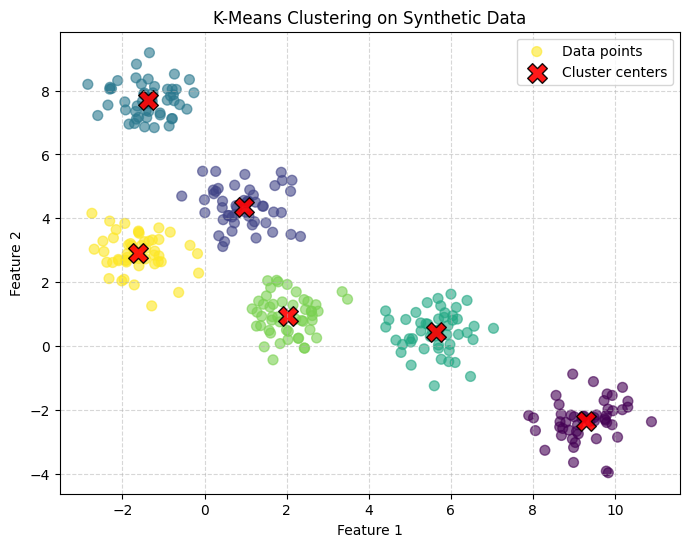

In [5]:
# === Step 4: Initialize & run K-Means clustering ===
# We choose 4 clusters because we generated our blobs with 4 centers
kmeans = KMeans(
    n_clusters=6,      # number of clusters to form
    random_state=0     # ensures we get the same clustering every time
)
kmeans.fit(X)           # learn cluster centroids from the data
y_kmeans = kmeans.predict(X)
# y_kmeans now holds the cluster label (0–3) for each sample in X

# === Step 5: Visualize the clustering results ===
plt.figure(figsize=(8,6))

# Plot each data point, coloring by its assigned cluster label
plt.scatter(
    X[:, 0],           # x-coordinate (Feature 1)
    X[:, 1],           # y-coordinate (Feature 2)
    c=y_kmeans,        # color by cluster assignment
    s=50,              # marker size
    cmap='viridis',    # color map for distinct cluster colors
    alpha=0.6          # make points slightly transparent to see overlap
)

# Overlay the learned cluster centers
centers = kmeans.cluster_centers_
plt.scatter(
    centers[:, 0],     # x-coordinates of centroids
    centers[:, 1],     # y-coordinates of centroids
    c='red',           # use a single color to highlight centroids
    s=200,             # make them larger for emphasis
    marker='X',        # use an X marker for clarity
    edgecolor='k',     # black border so they stand out
    alpha=0.9          # almost opaque
)

# Annotate the plot
plt.xlabel('Feature 1')   # label for the x-axis
plt.ylabel('Feature 2')   # label for the y-axis
plt.title('K-Means Clustering on Synthetic Data')
plt.legend(
    ['Data points', 'Cluster centers'],
    loc='upper right'
)
plt.grid(True, linestyle='--', alpha=0.5)
# add a light grid to help read coordinates

plt.show()  # render the plot

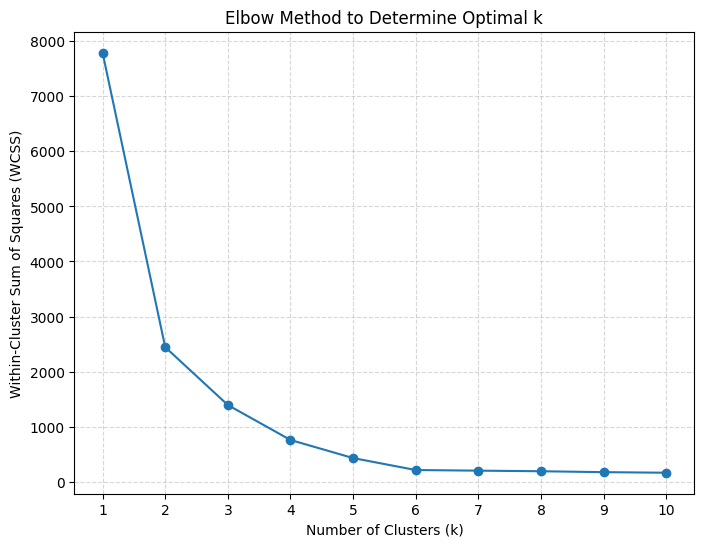

In [6]:
# === Step 6: Use the Elbow Method to find the optimal number of clusters ===

# 1. Compute WCSS (Within-Cluster Sum of Squares) for k=1 through k=10
wcss = []
for k in range(1, 11):
    # Initialize KMeans with k clusters
    kmeans = KMeans(
        n_clusters=k,      # testing k clusters
        random_state=0     # for reproducible results
    )
    kmeans.fit(X)         # fit the model on our data
    # inertia_ is the WCSS: sum of squared distances of samples to their nearest cluster center
    wcss.append(kmeans.inertia_)

# 2. Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(
    range(1, 11),         # k values
    wcss,                 # corresponding WCSS
    marker='o',           # circle markers for each point
    linestyle='-'         # solid line connecting the points
)

# 3. Label the plot for clarity
plt.xticks(range(1, 11))                         # show ticks at each k
plt.xlabel('Number of Clusters (k)')             # x-axis label
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')# y-axis label
plt.title('Elbow Method to Determine Optimal k') # plot title
plt.grid(True, linestyle='--', alpha=0.5)         # light grid for readability

plt.show()  # display the plot


In [9]:
# === Import Required Libraries ===
import numpy as np                    # Fundamental package for numerical computing (arrays, math operations)
import matplotlib.pyplot as plt       # Plotting library for creating charts and visualizations
from sklearn.datasets import load_iris  # Utility to load the classic Iris flower dataset
from sklearn.cluster import KMeans     # K-Means clustering algorithm for unsupervised learning
import seaborn as sns # Advance Library for Plotting

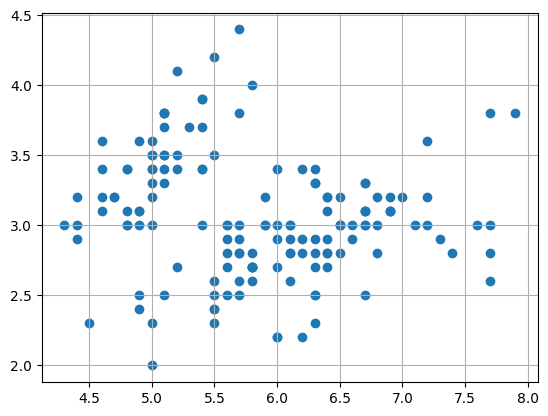

In [8]:
# Creating Custom Dataset with Make_blob and Plotting it
X,y = load_iris(return_X_y=True)

fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()


In [10]:
# === Compute Sum of Squared Errors (SSE) for k = 1 to 10 ===
sse = []  # will hold the “inertia_” (cluster compactness) for each k

for k in range(1, 11):
    # 1) Initialize KMeans for this k
    km = KMeans(
        n_clusters=k,     # number of clusters to test
        random_state=2    # fixed seed for reproducibility
    )

    # 2) Fit the algorithm on our dataset
    km.fit(X)

    # 3) inertia_ is the sum of squared distances of samples to their nearest centroid
    #    Lower values mean tighter clusters.
    sse.append(km.inertia_)

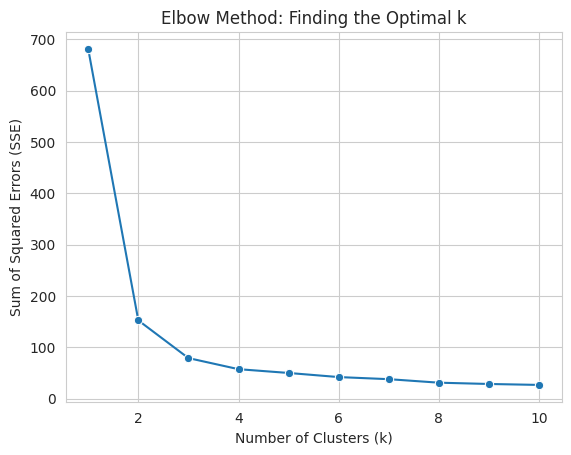

In [11]:
# ===  Configure the visual style for the plot ===
import seaborn as sns
sns.set_style("whitegrid")  # Use a light grid background for better readability

# === Step: Draw the Elbow curve using seaborn ===
g = sns.lineplot(
    x=range(1, 11),     # k values from 1 to 10
    y=sse,              # Sum of Squared Errors for each k
    marker='o'          # Add circle markers at each data point
)

# === Step: Label axes and title for clarity ===
g.set(
    xlabel="Number of Clusters (k)",           # Label for the x-axis
    ylabel="Sum of Squared Errors (SSE)",      # Label for the y-axis
    title="Elbow Method: Finding the Optimal k" # Title of the plot
)

# === Step: Render the plot to the screen ===
plt.show()

In [12]:
# === Initialize K-Means with the chosen cluster count ===
# Based on the Elbow Method, we select k = 3 for our dataset
kmeans = KMeans(
    n_clusters=3,      # number of clusters to form
    random_state=2     # fixed seed for reproducibility
)

# === Fit the K-Means model to our data ===
# This step computes the centroids and assigns each sample in X to a cluster
kmeans.fit(X)

KMeans(n_clusters=3, random_state=2)

In [13]:
# finding the center Points
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [14]:
pred = kmeans.fit_predict(X)  # cluster labels
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

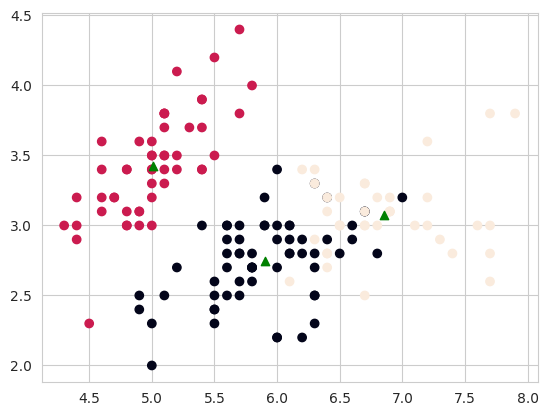

In [15]:
import matplotlib.pyplot as plt  # plotting lib

plt.scatter(X[:, 0], X[:, 1], c=pred)  # data pts
for i in range(len(kmeans.cluster_centers_)):
    center = kmeans.cluster_centers_[i]  # centroid coords
    plt.scatter(center[0], center[1], marker='^', c='green')  # centroid
plt.show()  # display plot